### Import Libraries

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
#nltk.download()
from nltk import tokenize
from nltk.corpus import stopwords
from tqdm import trange
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sb

### Get combined dataset from csv files

In [7]:
file_path_csv = "crisisnlp-disaster/combined_dataset.csv"
dtype_dict = {
    'text': 'str',
    'label': 'int32'
}

df = pd.read_csv(file_path_csv, dtype=dtype_dict)
print(df.dtypes)
df = df.dropna().reset_index(drop=True)
df.head(124)

text     object
label     int32
dtype: object


,text,label
0,tappanakii with happybirthday,0
1,why you should start paying attention to pro s...,0
2,me before sending a risky text vs. me after it...,0
3,capt.erwin 👫💑,0
4,lot of blackberry lane winter theme cross stit...,0
...,...,...
119,faith tryin to give me a kiss thru the shower ...,0
120,you can be my bitch for a day ,0
121,@chucktodd does the tea party have any members...,0
122,ite ite my official birthday_party has bin mov...,0


In [8]:
df.tail(10)

,text,label
191667,south canyon fire fatalities lessons learned: ...,5
191668,this image from nasa shows the scar from the w...,5
191669,as we are thinking about fireworks today in ca...,5
191670,@cmpunk but i think they said they were going ...,5
191671,check out and bid on a year supply of to help ...,5
191672,would rather watch wildfire on the hudson this...,5
191673,please please rt. help find lucky tiny terrior...,5
191674,it could be worse. i could be in colorado wher...,5
191675,bc wildfire management says the smoky haze wil...,5
191676,"colorado springs is my town also, please if ya...",5


In [9]:
df.describe()

,label
count,191677.000000
mean,1.228807
std,1.491131
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,5.000000


In [10]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
df.nunique()

text     178783
label         6
dtype: int64

In [12]:
df.dtypes

text     object
label     int32
dtype: object

### Exploratory Data Analysis

In [13]:
df['length'] = df['text'].str.len()
df.head(10)

,text,label,length
0,tappanakii with happybirthday,0,29
1,why you should start paying attention to pro s...,0,72
2,me before sending a risky text vs. me after it...,0,55
3,capt.erwin 👫💑,0,13
4,lot of blackberry lane winter theme cross stit...,0,76
5,thinking about pulling up to philly tomorrow,0,44
6,my nail hurts so bad.,0,21
7,that's good enough for me!,0,26
8,"usa bargains apple ipad air b retina t gen, wi...",0,63
9,start buying aaa and indie games at ridiculous...,0,109


In [14]:
df.tail(10)

,text,label,length
191667,south canyon fire fatalities lessons learned: ...,5,67
191668,this image from nasa shows the scar from the w...,5,105
191669,as we are thinking about fireworks today in ca...,5,121
191670,@cmpunk but i think they said they were going ...,5,130
191671,check out and bid on a year supply of to help ...,5,92
191672,would rather watch wildfire on the hudson this...,5,84
191673,please please rt. help find lucky tiny terrior...,5,114
191674,it could be worse. i could be in colorado wher...,5,122
191675,bc wildfire management says the smoky haze wil...,5,119
191676,"colorado springs is my town also, please if ya...",5,80


In [15]:
df['text'] = df['text'].astype(str)

def word_count(item):
    item_list = item.split()
    return len(item_list)

df['word_count'] = df['text'].apply(word_count)
df.head(10)

,text,label,length,word_count
0,tappanakii with happybirthday,0,29,3
1,why you should start paying attention to pro s...,0,72,13
2,me before sending a risky text vs. me after it...,0,55,12
3,capt.erwin 👫💑,0,13,2
4,lot of blackberry lane winter theme cross stit...,0,76,12
5,thinking about pulling up to philly tomorrow,0,44,7
6,my nail hurts so bad.,0,21,5
7,that's good enough for me!,0,26,5
8,"usa bargains apple ipad air b retina t gen, wi...",0,63,13
9,start buying aaa and indie games at ridiculous...,0,109,19


In [16]:
df['mean_word_length'] = df['text'].map(lambda text: np.mean([len(word) for word in text.split()]))
df.head(10)

,text,label,length,word_count,mean_word_length
0,tappanakii with happybirthday,0,29,3,9.000000
1,why you should start paying attention to pro s...,0,72,13,4.615385
2,me before sending a risky text vs. me after it...,0,55,12,3.666667
3,capt.erwin 👫💑,0,13,2,6.000000
4,lot of blackberry lane winter theme cross stit...,0,76,12,5.416667
5,thinking about pulling up to philly tomorrow,0,44,7,5.428571
6,my nail hurts so bad.,0,21,5,3.400000
7,that's good enough for me!,0,26,5,4.400000
8,"usa bargains apple ipad air b retina t gen, wi...",0,63,13,3.923077
9,start buying aaa and indie games at ridiculous...,0,109,19,4.789474


In [17]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['text'][0])])

np.float64(29.0)

In [18]:
df['mean_sent_length'] = df['text'].map(lambda text: np.mean([len(sent) for sent in tokenize.sent_tokenize(text)]))
df.head(10)

,text,label,length,word_count,mean_word_length,mean_sent_length
0,tappanakii with happybirthday,0,29,3,9.000000,29.0
1,why you should start paying attention to pro s...,0,72,13,4.615385,35.5
2,me before sending a risky text vs. me after it...,0,55,12,3.666667,55.0
3,capt.erwin 👫💑,0,13,2,6.000000,13.0
4,lot of blackberry lane winter theme cross stit...,0,76,12,5.416667,76.0
5,thinking about pulling up to philly tomorrow,0,44,7,5.428571,44.0
6,my nail hurts so bad.,0,21,5,3.400000,21.0
7,that's good enough for me!,0,26,5,4.400000,26.0
8,"usa bargains apple ipad air b retina t gen, wi...",0,63,13,3.923077,63.0
9,start buying aaa and indie games at ridiculous...,0,109,19,4.789474,54.0


In [19]:
def visualize(col):
    palette = {
        np.int64(0): 'tab:purple',
        np.int64(1): 'tab:green',
        np.int64(2): 'tab:orange',
        np.int64(3): 'tab:red',
        np.int64(4): 'tab:pink',
        np.int64(5): 'tab:blue',
    }
    palette_rev = {
        np.int64(0): 'tab:blue',
        np.int64(1): 'tab:pink',
        np.int64(2): 'tab:red',
        np.int64(3): 'tab:orange',
        np.int64(4): 'tab:green',
        np.int64(5): 'tab:purple',
    }
    
    print()
    plt.subplots_adjust(right=1.5)
    plt.subplot(1,2,1)
    sb.boxplot(y=df[col], hue=df['label'], palette=palette)
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sb.kdeplot(x=df[col], hue=df['label'], palette=palette_rev)
    #plt.xticks([0, 25, 50, 75, 100])
    plt.xlim(0, 200)
    plt.legend(df['label'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

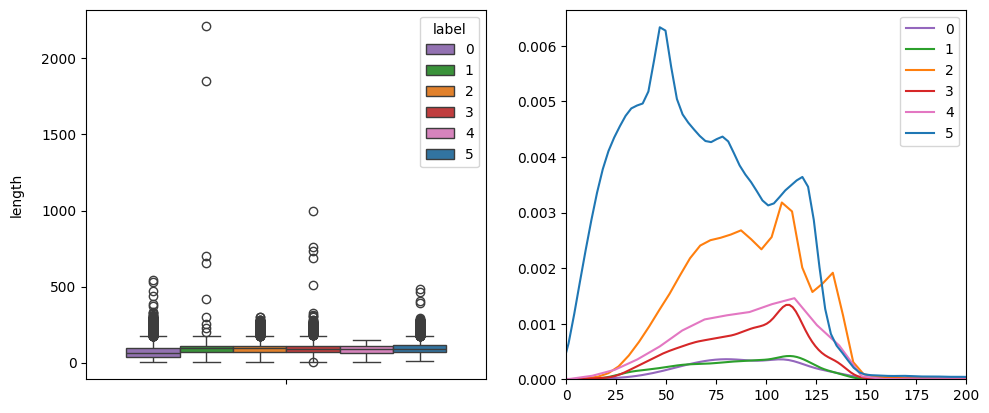

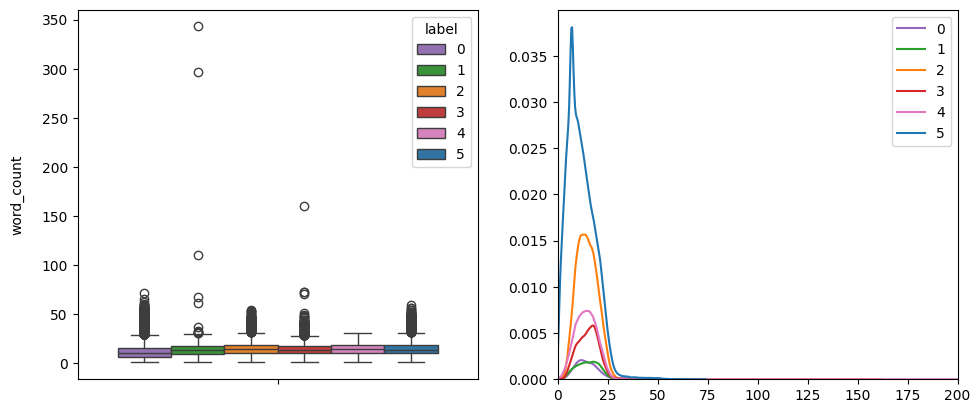

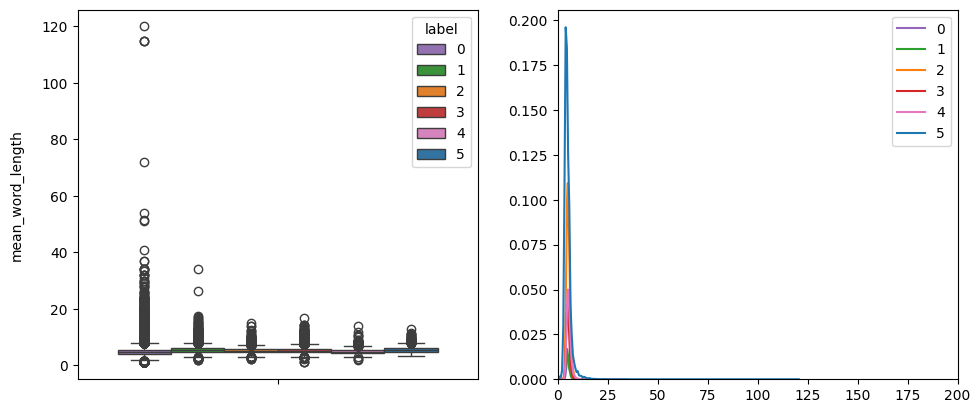

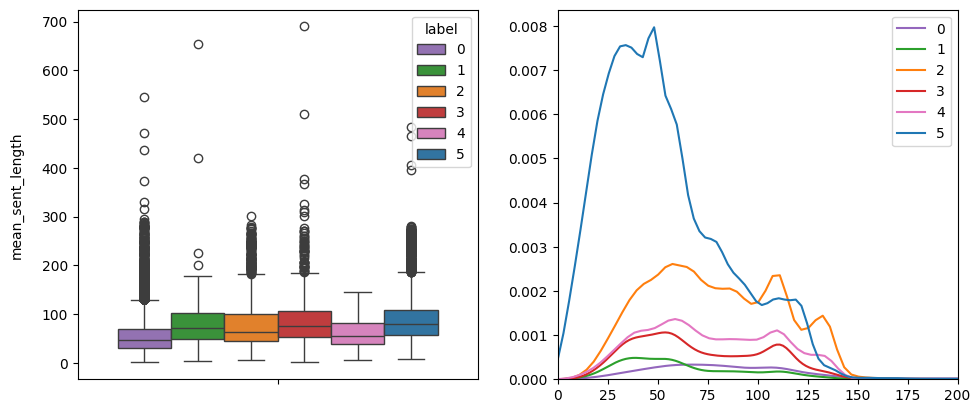

In [20]:
features = df.columns.tolist()[2:]
for feature in features:
    visualize(feature)

### Term Frequency Analysis

In [21]:
df = df.drop(features, axis=1)
df.head()

,text,label
0,tappanakii with happybirthday,0
1,why you should start paying attention to pro s...,0
2,me before sending a risky text vs. me after it...,0
3,capt.erwin 👫💑,0
4,lot of blackberry lane winter theme cross stit...,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191677 entries, 0 to 191676
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    191677 non-null  object
 1   label   191677 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 2.2+ MB


In [23]:
def clean(text):
    
    text = text.lower()
    #text = re.sub(r'[^a-z0-9\s-]+', '', text)
    text = re.sub(r'[^a-z0-9\s-]|(?<=\s)-|-(?=\s)', '', text)
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    
    return text

def corpus(text):
    text_list = text.split()
    return text_list

In [24]:
df['text_clean'] = df['text'].apply(clean)
df.head(10)

,text,label,text_clean
0,tappanakii with happybirthday,0,tappanakii happybirthday
1,why you should start paying attention to pro s...,0,start paying attention pro softball sports earth
2,me before sending a risky text vs. me after it...,0,sending risky text vs pays
3,capt.erwin 👫💑,0,capterwin
4,lot of blackberry lane winter theme cross stit...,0,lot blackberry lane winter theme cross stitch ...
5,thinking about pulling up to philly tomorrow,0,thinking pulling philly tomorrow
6,my nail hurts so bad.,0,nail hurts bad
7,that's good enough for me!,0,thats good enough
8,"usa bargains apple ipad air b retina t gen, wi...",0,usa bargains apple ipad air b retina gen wi-fi...
9,start buying aaa and indie games at ridiculous...,0,start buying aaa indie games ridiculous low pr...


In [25]:
df['text_lists'] = df['text_clean'].apply(corpus)
df.head(10)

,text,label,text_clean,text_lists
0,tappanakii with happybirthday,0,tappanakii happybirthday,"[tappanakii, happybirthday]"
1,why you should start paying attention to pro s...,0,start paying attention pro softball sports earth,"[start, paying, attention, pro, softball, spor..."
2,me before sending a risky text vs. me after it...,0,sending risky text vs pays,"[sending, risky, text, vs, pays]"
3,capt.erwin 👫💑,0,capterwin,[capterwin]
4,lot of blackberry lane winter theme cross stit...,0,lot blackberry lane winter theme cross stitch ...,"[lot, blackberry, lane, winter, theme, cross, ..."
5,thinking about pulling up to philly tomorrow,0,thinking pulling philly tomorrow,"[thinking, pulling, philly, tomorrow]"
6,my nail hurts so bad.,0,nail hurts bad,"[nail, hurts, bad]"
7,that's good enough for me!,0,thats good enough,"[thats, good, enough]"
8,"usa bargains apple ipad air b retina t gen, wi...",0,usa bargains apple ipad air b retina gen wi-fi...,"[usa, bargains, apple, ipad, air, b, retina, g..."
9,start buying aaa and indie games at ridiculous...,0,start buying aaa indie games ridiculous low pr...,"[start, buying, aaa, indie, games, ridiculous,..."


In [26]:
df.head(10)

,text,label,text_clean,text_lists
0,tappanakii with happybirthday,0,tappanakii happybirthday,"[tappanakii, happybirthday]"
1,why you should start paying attention to pro s...,0,start paying attention pro softball sports earth,"[start, paying, attention, pro, softball, spor..."
2,me before sending a risky text vs. me after it...,0,sending risky text vs pays,"[sending, risky, text, vs, pays]"
3,capt.erwin 👫💑,0,capterwin,[capterwin]
4,lot of blackberry lane winter theme cross stit...,0,lot blackberry lane winter theme cross stitch ...,"[lot, blackberry, lane, winter, theme, cross, ..."
5,thinking about pulling up to philly tomorrow,0,thinking pulling philly tomorrow,"[thinking, pulling, philly, tomorrow]"
6,my nail hurts so bad.,0,nail hurts bad,"[nail, hurts, bad]"
7,that's good enough for me!,0,thats good enough,"[thats, good, enough]"
8,"usa bargains apple ipad air b retina t gen, wi...",0,usa bargains apple ipad air b retina gen wi-fi...,"[usa, bargains, apple, ipad, air, b, retina, g..."
9,start buying aaa and indie games at ridiculous...,0,start buying aaa indie games ridiculous low pr...,"[start, buying, aaa, indie, games, ridiculous,..."


### Most Commonly Occuring Words

In [27]:
non_disaster_corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    if (df['label'][i] == 0):
        non_disaster_corpus += df['text_lists'][i]
len(non_disaster_corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 191677/191677 [00:01<00:00, 141109.35it/s]


701164

In [28]:
non_disaster_mostCommon = Counter(non_disaster_corpus).most_common(10)
non_disaster_mostCommon

[('dont', 5683),
 ('im', 4585),
 ('need', 4058),
 ('like', 3606),
 ('love', 3579),
 ('amp', 3543),
 ('one', 3213),
 ('get', 3065),
 ('new', 3043),
 ('anything', 2835)]

In [29]:
non_disaster_words = []
non_disaster_freq = []
for word, count in non_disaster_mostCommon:
    non_disaster_words.append(word)
    non_disaster_freq.append(count)

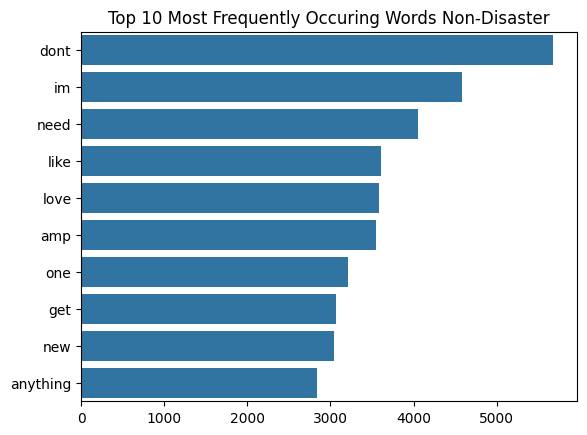

In [30]:
sb.barplot(x=non_disaster_freq, y=non_disaster_words)
plt.title('Top 10 Most Frequently Occuring Words Non-Disaster')
plt.show()

In [31]:
earthquake_corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    if (df['label'][i] == 1):
        earthquake_corpus += df['text_lists'][i]
len(earthquake_corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 191677/191677 [00:00<00:00, 195401.33it/s]


205752

In [32]:
earthquake_mostCommon = Counter(earthquake_corpus).most_common(10)
earthquake_mostCommon

[('earthquake', 10413),
 ('nepal', 5356),
 ('rt', 2616),
 ('mexico', 2195),
 ('quake', 2042),
 ('help', 1963),
 ('people', 1719),
 ('nepalearthquake', 1557),
 ('chile', 1386),
 ('amp', 1378)]

In [33]:
earthquake_words = []
earthquake_freq = []
for word, count in earthquake_mostCommon:
    earthquake_words.append(word)
    earthquake_freq.append(count)

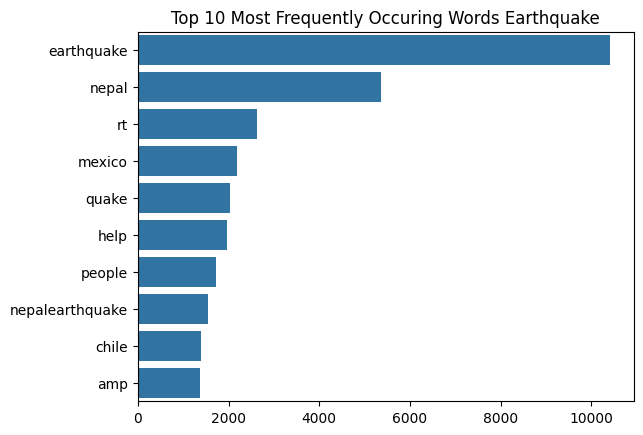

In [34]:
sb.barplot(x=earthquake_freq, y=earthquake_words)
plt.title('Top 10 Most Frequently Occuring Words Earthquake')
plt.show()

In [35]:
flood_corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    if (df['label'][i] == 2):
        flood_corpus += df['text_lists'][i]
len(flood_corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 191677/191677 [00:00<00:00, 198553.34it/s]


155050

In [36]:
flood_mostCommon = Counter(flood_corpus).most_common(10)
flood_mostCommon

[('flood', 5405),
 ('floods', 2724),
 ('yycflood', 1905),
 ('queensland', 1628),
 ('india', 1473),
 ('flooding', 1447),
 ('abflood', 1326),
 ('calgary', 1143),
 ('australia', 1085),
 ('help', 998)]

In [37]:
flood_words = []
flood_freq = []
for word, count in flood_mostCommon:
    flood_words.append(word)
    flood_freq.append(count)

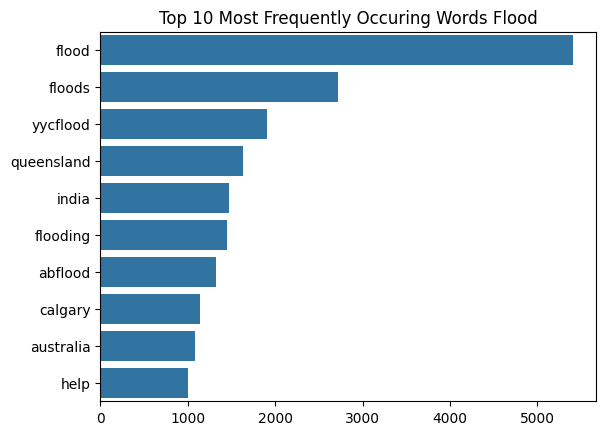

In [38]:
sb.barplot(x=flood_freq, y=flood_words)
plt.title('Top 10 Most Frequently Occuring Words Flood')
plt.show()

In [39]:
hurricane_corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    if (df['label'][i] == 3):
        hurricane_corpus += df['text_lists'][i]
len(hurricane_corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 191677/191677 [00:01<00:00, 173319.37it/s]


433914

In [40]:
hurricane_mostCommon = Counter(hurricane_corpus).most_common(10)
hurricane_mostCommon

[('hurricane', 16121),
 ('irma', 7550),
 ('harvey', 7404),
 ('puerto', 4163),
 ('help', 4027),
 ('maria', 3817),
 ('rico', 3683),
 ('sandy', 3583),
 ('amp', 2816),
 ('damage', 2758)]

In [41]:
hurricane_words = []
hurricane_freq = []
for word, count in hurricane_mostCommon:
    hurricane_words.append(word)
    hurricane_freq.append(count)

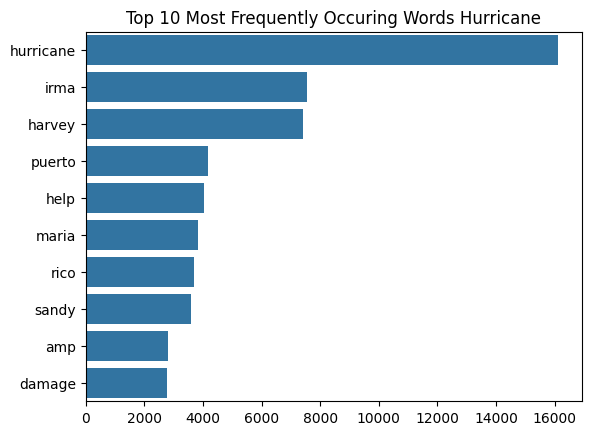

In [42]:
sb.barplot(x=hurricane_freq, y=hurricane_words)
plt.title('Top 10 Most Frequently Occuring Words Hurricane')
plt.show()

In [43]:
tornado_corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    if (df['label'][i] == 4):
        tornado_corpus += df['text_lists'][i]
len(tornado_corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 191677/191677 [00:00<00:00, 211411.10it/s]


54027

In [44]:
tornado_mostCommon = Counter(tornado_corpus).most_common(10)
tornado_mostCommon

[('tornado', 3630),
 ('oklahoma', 2646),
 ('moore', 705),
 ('help', 497),
 ('prayers', 462),
 ('people', 453),
 ('victims', 440),
 ('ok', 397),
 ('joplin', 359),
 ('warning', 306)]

In [45]:
tornado_words = []
tornado_freq = []
for word, count in tornado_mostCommon:
    tornado_words.append(word)
    tornado_freq.append(count)

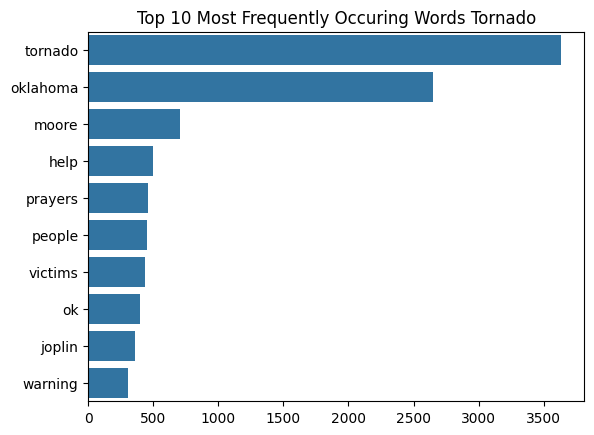

In [46]:
sb.barplot(x=tornado_freq, y=tornado_words)
plt.title('Top 10 Most Frequently Occuring Words Tornado')
plt.show()

In [47]:
wildfire_corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    if (df['label'][i] == 5):
        wildfire_corpus += df['text_lists'][i]
len(wildfire_corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 191677/191677 [00:00<00:00, 215404.72it/s]


62795

In [48]:
wildfire_mostCommon = Counter(wildfire_corpus).most_common(10)
wildfire_mostCommon

[('wildfire', 1670),
 ('wildfires', 1456),
 ('fire', 1272),
 ('california', 1179),
 ('greece', 833),
 ('rt', 816),
 ('colorado', 691),
 ('fires', 686),
 ('fort', 565),
 ('mcmurray', 505)]

In [49]:
wildfire_words = []
wildfire_freq = []
for word, count in wildfire_mostCommon:
    wildfire_words.append(word)
    wildfire_freq.append(count)

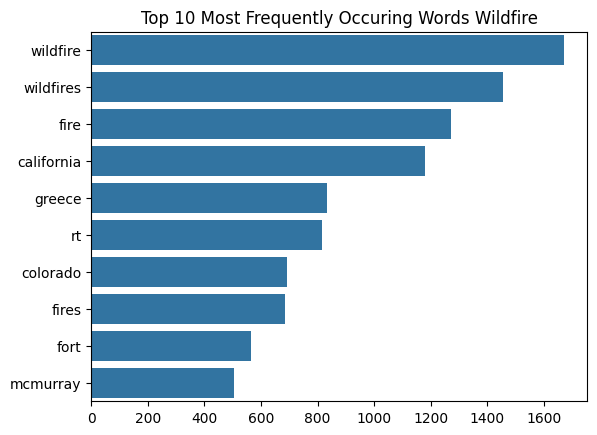

In [50]:
sb.barplot(x=wildfire_freq, y=wildfire_words)
plt.title('Top 10 Most Frequently Occuring Words Wildfire')
plt.show()

### Most Commonly Occuring N-Grams

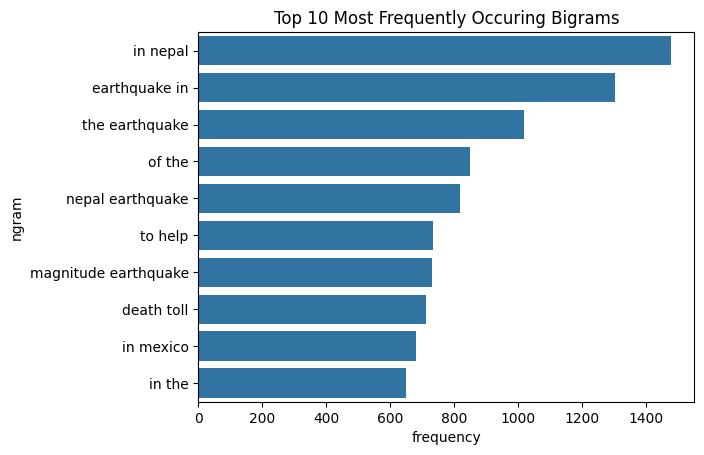

In [51]:
earthquake_df = df[df['label'] == 1]
cv = CountVectorizer(ngram_range=(2,2), min_df=5)
earthquake_bigrams = cv.fit_transform(earthquake_df['text'])
count_values = earthquake_bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sb.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

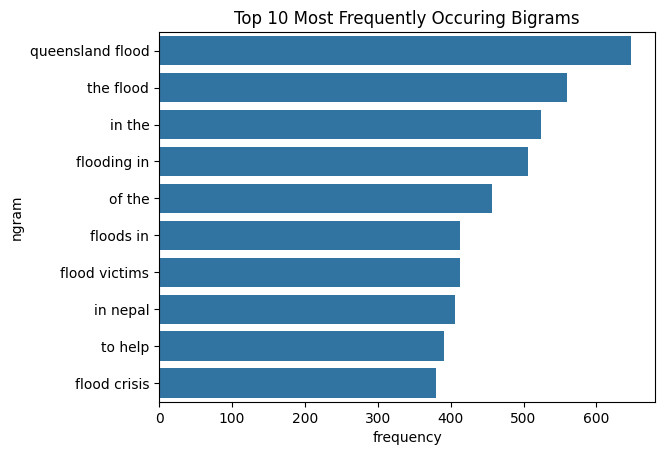

In [52]:
flood_df = df[df['label'] == 2]
cv = CountVectorizer(ngram_range=(2,2), min_df=5)
flood_bigrams = cv.fit_transform(flood_df['text'])
count_values = flood_bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sb.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

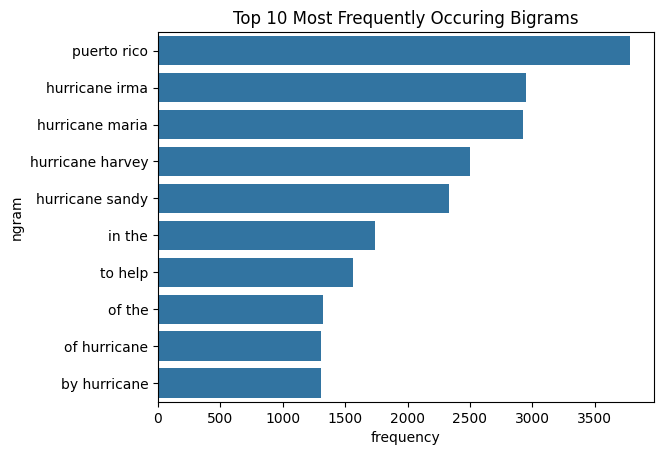

In [53]:
hurricane_df = df[df['label'] == 3]
cv = CountVectorizer(ngram_range=(2,2), min_df=5)
hurricane_bigrams = cv.fit_transform(hurricane_df['text'])
count_values = hurricane_bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sb.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

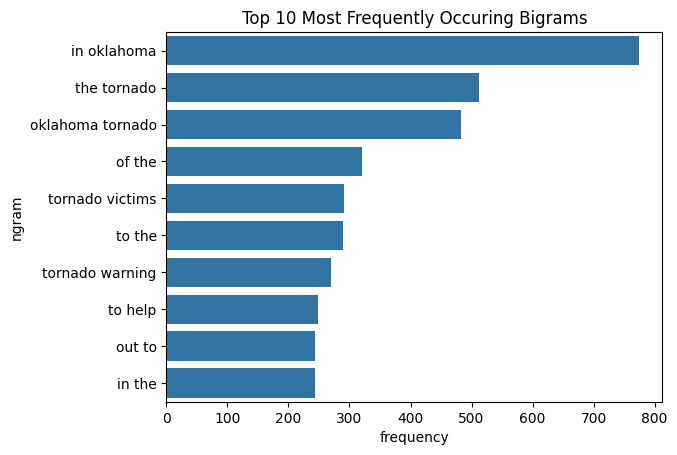

In [54]:
tornado_df = df[df['label'] == 4]
cv = CountVectorizer(ngram_range=(2,2), min_df=5)
tornado_bigrams = cv.fit_transform(tornado_df['text'])
count_values = tornado_bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sb.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

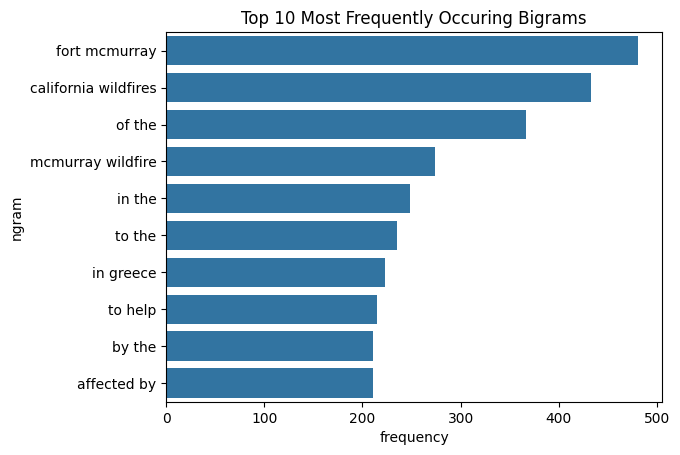

In [55]:
wildfire_df = df[df['label'] == 5]
cv = CountVectorizer(ngram_range=(2,2), min_df=5)
wildfire_bigrams = cv.fit_transform(wildfire_df['text'])
count_values = wildfire_bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sb.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()